In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_C.csv')
df

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,157138,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,1,116144,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,2,145603,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,3,79929,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,4,52554,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41253,41253,55217,15641043,Onyemere,641.0,Germany,Male,38.0,2,138166.30,2,0,1,69227.66,0
41254,41254,110969,15674541,Robinson,575.0,France,Male,52.0,8,0.00,2,0,1,111342.66,0
41255,41255,132494,15700601,Kao,571.0,France,Male,34.0,1,119452.03,2,1,1,173511.72,0
41256,41256,31177,15806926,Nkemjika,624.0,France,Male,38.0,4,0.00,1,0,0,40320.30,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41246 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [4]:
df.isnull().sum()

Unnamed: 0          0
id                  0
CustomerId          0
Surname             0
CreditScore        12
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

In [5]:
df['Geography'].value_counts()

Geography
France     23469
Spain       9057
Germany     8732
Name: count, dtype: int64

In [6]:
df['Gender'].value_counts()

Gender
Male      23219
Female    18039
Name: count, dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'CustomerId'}>],
       [<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'churn'}>]], dtype=object)

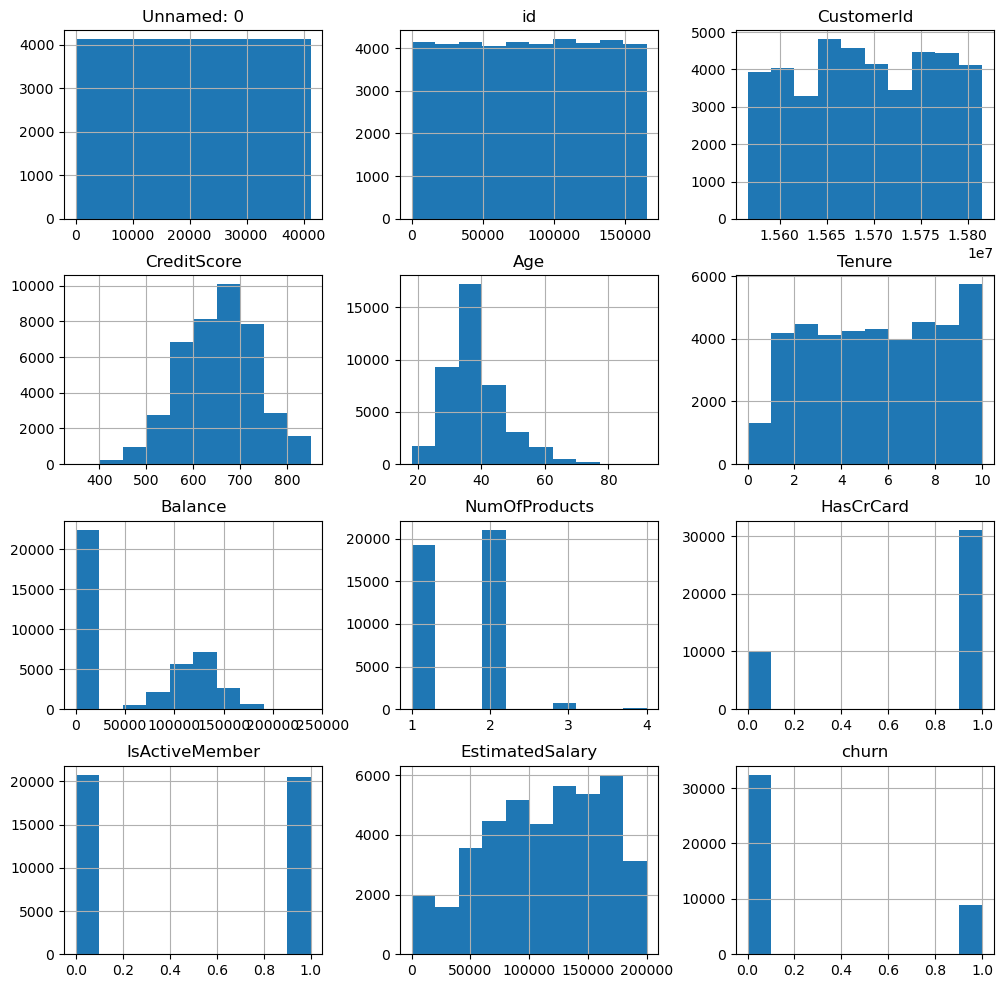

In [7]:
#numeric value histogram
df.hist(figsize = (12,12))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41246 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


# Split data

In [9]:
input_df=df.drop('churn',axis=1)
output_df=df['churn']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42) 
# random_state utk mengambil data scr random namun sama jika di run kembali shg jika dilakukan tuning model, data tidak berubah

# Data Preprocessing

In [11]:
x_train.isnull().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        9
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [12]:
x_test.isnull().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        3
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

## Delete variabel yang tidak digunakan

In [13]:
#Remove columns
x_train = x_train.drop('CustomerId', axis=1)
x_train = x_train.drop('id', axis=1)
x_train = x_train.drop('Surname', axis=1)
x_train = x_train.drop('Unnamed: 0', axis=1)

x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
15731,725.0,Spain,Female,31.0,2,0.00,2,0,0,71830.10
6996,688.0,Spain,Male,36.0,4,0.00,1,1,0,129870.93
30824,748.0,France,Female,23.0,7,118028.35,1,0,1,41626.78
40019,701.0,France,Female,45.0,5,0.00,2,1,1,158948.63
21501,590.0,France,Female,23.0,5,113923.81,3,1,0,196789.90


In [14]:
#Remove columns
x_test = x_test.drop('CustomerId', axis=1)
x_test = x_test.drop('id', axis=1)
x_test = x_test.drop('Surname', axis=1)
x_test = x_test.drop('Unnamed: 0', axis=1)

x_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
22930,787.0,France,Male,36.0,6,170840.08,1,0,1,101371.72
4280,735.0,France,Male,30.0,2,0.00,2,1,1,132908.07
40587,711.0,France,Female,58.0,4,0.00,1,1,1,119110.03
31318,691.0,Spain,Male,33.0,5,0.00,2,1,0,2010.98
34854,574.0,Spain,Male,37.0,7,128061.00,1,1,0,62375.10


## Convert categorical data

In [15]:
train_encode={"Gender": {"Male":1,"Female" :0}, "Geography":{"Spain":2,"France":1, "Germany":0}}
test_encode={"Gender": {"Male":1,"Female" :0}, "Geography":{"Spain":2,"France":1, "Germany":0}}

#replace categorical value into numerical value
x_train=x_train.replace(train_encode)
x_test=x_test.replace(test_encode)

x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
15731,725.0,2,0,31.0,2,0.00,2,0,0,71830.10
6996,688.0,2,1,36.0,4,0.00,1,1,0,129870.93
30824,748.0,1,0,23.0,7,118028.35,1,0,1,41626.78
40019,701.0,1,0,45.0,5,0.00,2,1,1,158948.63
21501,590.0,1,0,23.0,5,113923.81,3,1,0,196789.90


In [16]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33006 entries, 15731 to 15795
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      32997 non-null  float64
 1   Geography        33006 non-null  int64  
 2   Gender           33006 non-null  int64  
 3   Age              33006 non-null  float64
 4   Tenure           33006 non-null  int64  
 5   Balance          33006 non-null  float64
 6   NumOfProducts    33006 non-null  int64  
 7   HasCrCard        33006 non-null  int64  
 8   IsActiveMember   33006 non-null  int64  
 9   EstimatedSalary  33006 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 2.8 MB


## Outlier

In [18]:
total = 0
num_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for col in num_col:
    q1 = x_train[col].quantile(0.25)
    q3 = x_train[col].quantile(0.75)
    iqr = q3-q1
    outliers = x_train[(x_train[col] < (q1 - 1.5*iqr)) | (x_train[col] > (q3 + 1.5*iqr))]
    length = len(outliers)
    total = total+length
    print(f"column {col} has {length} outliers")

print("\ntotal outliers is", total,"out of", len(x_train))

column CreditScore has 47 outliers
column Age has 1338 outliers
column Tenure has 0 outliers
column Balance has 0 outliers
column EstimatedSalary has 0 outliers

total outliers is 1385 out of 33006


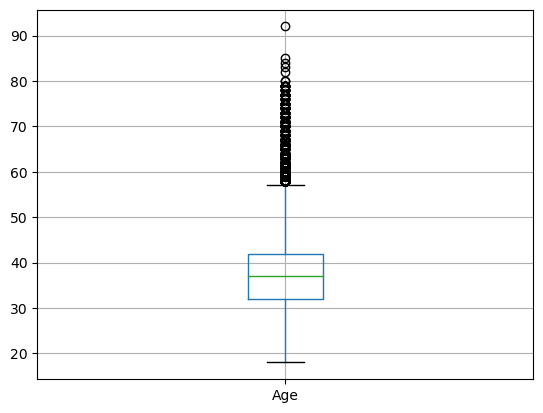

In [19]:
boxplot = x_train.boxplot(column=['Age']) 
plt.show()

In [20]:
x_train.loc[outliers.index, 'Age'] = x_train['Age'].median() #replace outlier with median

## Impute missing value

In [21]:
column_name = 'CreditScore'

# Calculate the mean of the column
train_credit_mean = x_train[column_name].mean()
test_credit_mean = x_test[column_name].mean()

# Replace missing values with the mean
x_train[column_name].fillna(train_credit_mean, inplace=True)
x_test[column_name].fillna(test_credit_mean, inplace=True)

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Geography'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>, <Axes: >, <Axes: >]],
      dtype=object)

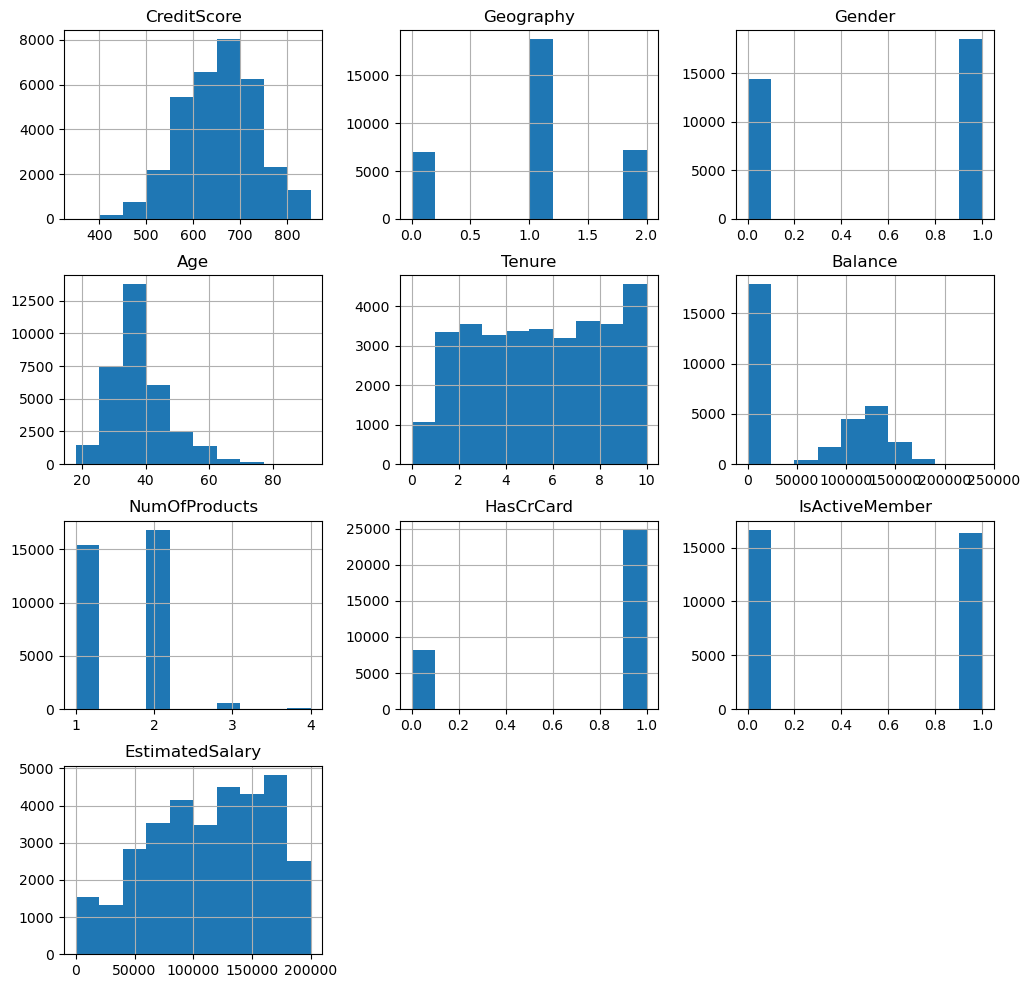

In [23]:
x_train.hist(figsize = (12,12))

In [28]:
x_train.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,33006.000000,33006.000000,33006.000000,33006.000000,33006.000000,33006.000000,33006.000000,33006.000000,33006.000000,33006.000000
mean,655.778950,1.006302,0.561474,38.154147,5.035388,55687.949879,1.554960,0.753408,0.494637,112663.985140
std,79.765323,0.656311,0.496214,8.958740,2.818784,62893.272022,0.546734,0.431033,0.499979,50074.542347
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,597.000000,1.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74835.650000
50%,659.000000,1.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.880000
75%,710.000000,1.000000,1.000000,42.000000,7.000000,120599.210000,2.000000,1.000000,1.000000,154843.400000
max,850.000000,2.000000,1.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000


In [34]:
x_train['IsActiveMember'].value_counts()

IsActiveMember
0    16680
1    16326
Name: count, dtype: int64

# Modelling

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4) #max_depth=4 utk menghindari overfitting
RF_class.fit(x_train, y_train)

y_predict=RF_class.predict(x_test)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      6431
           1       0.80      0.35      0.49      1821

    accuracy                           0.84      8252
   macro avg       0.82      0.66      0.70      8252
weighted avg       0.83      0.84      0.81      8252



### Tuning parameter

In [24]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[4,6,8,10,12], 
}

RF_class2 = RandomForestClassifier()
RF_class2= GridSearchCV(RF_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)  # cross-validation utk menghindari overfitting

RF_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("Accuracy :",RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 10}
Accuracy : 0.862176409153947


In [25]:
#Train the data using based parameter
RF_class_best = RandomForestClassifier(criterion= 'entropy',max_depth=10)
RF_class_best.fit(x_train,y_train)
y_predict_best=RF_class_best.predict(x_test)

print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6431
           1       0.77      0.53      0.63      1821

    accuracy                           0.86      8252
   macro avg       0.82      0.74      0.77      8252
weighted avg       0.85      0.86      0.85      8252



## Xgboost

In [34]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate = 0.1) #n_estimators=100 adalah jumlah tree yg digunakan
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6431
           1       0.75      0.57      0.65      1821

    accuracy                           0.86      8252
   macro avg       0.82      0.76      0.78      8252
weighted avg       0.86      0.86      0.86      8252



Kita akan memakai model Xgboost karena memiliki nilai f1-score yang lebih baik dibandingkan model random forest

# Save model

In [36]:
import pickle as pkl
filename = 'xgb_model.pkl'
pkl.dump(xgb_model, open(filename, 'wb')) 